### Visualizing the MST with Blockages

In [21]:
import matplotlib.pyplot as plt
import networkx as nx

# Function to calculate Manhattan distance
def manhattan_distance(point1, point2):
    """
    Computes the Manhattan distance between two points.

    :param point1: (x1, y1)
    :param point2: (x2, y2)
    :return: Manhattan distance
    """
    return abs(point1[0] - point2[0]) + abs(point1[1] - point2[1])

# Function to read .outb file
def read_out_file(file_path):
    """
    Reads the sinks, blockages, points, and edges from the .outb file.

    :param file_path: path of output file
    :return: list of sinks, list of blockages, list of points, and list of edges
    """
    sinks = []
    blockages = []
    points = []
    edges = []

    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()
            if line.startswith("sink"):
                parts = line.split()
                id, x, y = int(parts[1]), float(parts[2]), float(parts[3])
                sinks.append((id, x, y))
            elif line.startswith("blockage"):
                parts = line.split()
                id, x1, y1, x2, y2 = int(parts[1]), float(parts[2]), float(parts[3]), float(parts[4]), float(parts[5])
                blockages.append((id, x1, y1, x2, y2))
            elif line.startswith("point"):
                parts = line.split()
                id, x, y = int(parts[1]), float(parts[2]), float(parts[3])
                points.append((id, x, y))
            elif line.startswith("edge"):
                parts = line.split()
                u, v = int(parts[1]), int(parts[2])
                edges.append((u, v))

    return sinks, blockages, points, edges

# Function to calculate edge weights for all edges
def calculate_edge_weights(edges, node_positions):
    """
    Calculates the edges weights using Manhattan distance for all edges

    :param edges: list of edges where each edge is a tuple (u, v)
    :param node_positions: dictionary that maps node IDs to its coordinates
    :return: dictionary of edge weights and total wire length
    """
    edge_weights = {}
    total_wire_length = 0
    for u, v in edges:
        x1, y1 = node_positions[u]
        x2, y2 = node_positions[v]
        weight = manhattan_distance((x1, y1), (x2, y2))
        edge_weights[(u, v)] = round(weight, 2)
        total_wire_length += weight
    return edge_weights, total_wire_length

# Function that plots the graph
def plot_graph(sinks, points, edges, blockages=None):
    G = nx.Graph()

    # Add sinks and points as nodes
    node_positions = {}
    for id, x, y in sinks:
        G.add_node(id, pos=(x, y), type="sink")
        node_positions[id] = (x, y)
    for id, x, y in points:
        G.add_node(id, pos=(x, y), type="point")
        node_positions[id] = (x, y)

    # Add edges
    G.add_edges_from(edges)

    # Calculate edge weights and total wire length
    edge_weights, total_wire_length = calculate_edge_weights(edges, node_positions)

    # Get positions and labels
    pos = nx.get_node_attributes(G, 'pos')
    node_types = nx.get_node_attributes(G, 'type')

    # Plot the graph
    plt.figure(figsize=(8, 8))

    # Draw edges
    nx.draw_networkx_edges(G, pos, edge_color="black", alpha=0.5)

    # Draw sinks and points with different colors
    sink_nodes = [n for n in G.nodes if node_types[n] == "sink"]
    point_nodes = [n for n in G.nodes if node_types[n] == "point"]

    nx.draw_networkx_nodes(G, pos, nodelist=sink_nodes, node_color="blue", label="Sinks", node_size=200)
    nx.draw_networkx_nodes(G, pos, nodelist=point_nodes, node_color="red", label="Points", node_size=200)

    # Draw labels for nodes with coordinates
    for node, (x, y) in pos.items():
        plt.text(x, y + 0.2, f"({x},{y})", ha='center', va='bottom', fontsize=8)

    # Draw edge labels (weights)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_weights, font_color="green", font_size=8)

    # Display total wire length 
    plt.text(
        0.95, 0.05, f"Total Wire Length: {round(total_wire_length, 2)}", 
        horizontalalignment="right", verticalalignment="center", 
        transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.8)
    )

    # Draw blockages if provided
    if blockages is not None:
        for blockage in blockages:
            rect = plt.Rectangle((blockage[1], blockage[2]), blockage[3]-blockage[1], blockage[4]-blockage[2], 
                                  facecolor="lightblue", alpha=0.5)
            plt.gca().add_patch(rect)
            # Add coordinates to the blockage 
            plt.text(blockage[1], blockage[2], f"({blockage[1]},{blockage[2]})", fontsize=8, color='black', ha='center') 
            plt.text(blockage[3], blockage[4], f"({blockage[3]},{blockage[4]})", fontsize=8, color='black', ha='center') 

    # Add legend
    plt.legend(scatterpoints=1, loc="best", fontsize=10)
    plt.title("Graph Visualization with Manhattan Edge Weights")
    plt.axis("equal")
    plt.show()

### Using the visualization code to plot some graphs
Note: This code still works for plots without blockages (as shown in the last cell).

Sinks: [(8, 2.7, 2.1), (14, -2.9, -1.6), (7, -1.5, -3.8)]
Blockages: [(202, -1.0, 3.0, -1.8, 0.4), (208, -2.1, -2.0, 3.0, -0.8)]
Points: [(103, -1.5, -1.6), (1002, 2.7, -1.6)]
Edges: [(14, 103), (7, 103), (8, 1002), (103, 1002)]


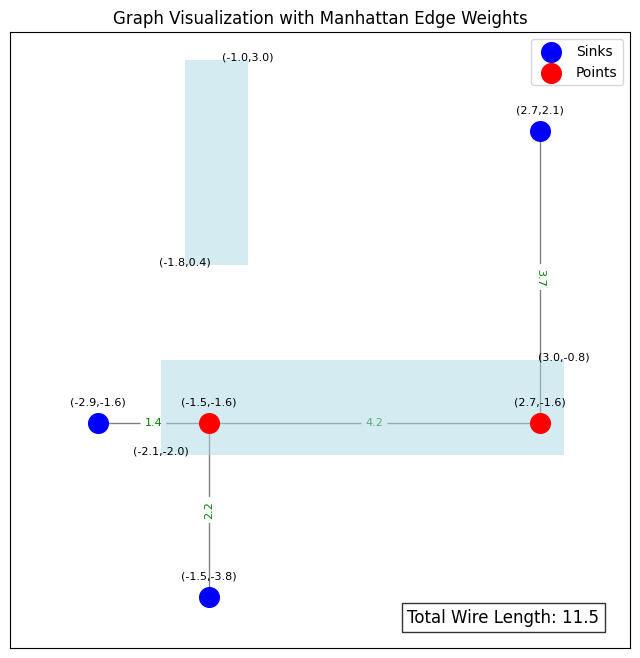

In [22]:
# File path to the .outb file
file_path = "./data_b/r31b.out"

# Read the .outb file
sinks, blockages, points, edges = read_out_file(file_path)

# Print the parsed data
print(f"Sinks: {sinks}")
print(f"Blockages: {blockages}")
print(f"Points: {points}")
print(f"Edges: {edges}")

# Plot the graph with blockages
plot_graph(sinks, points, edges, blockages=blockages)

Sinks: [(3, 1.3, 1.0), (19, 1.0, -2.4), (4, 1.0, 1.7), (14, 2.2, 1.9)]
Blockages: [(202, 1.8, -0.6, 2.0, 2.0), (208, 0.0, -1.6, 2.1, -0.8)]
Points: [(101, 1.0, 1.0), (1002, 1.0, 1.9)]
Edges: [(4, 1002), (3, 101), (4, 101), (14, 1002), (19, 101)]


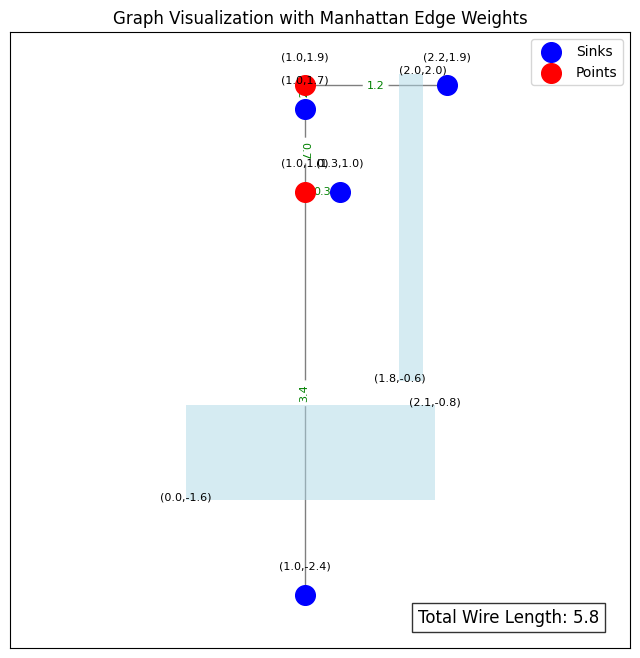

In [23]:
# File path to the .outb file
file_path = "./data_b/r42b.out"

# Read the .outb file
sinks, blockages, points, edges = read_out_file(file_path)

# Print the parsed data
print(f"Sinks: {sinks}")
print(f"Blockages: {blockages}")
print(f"Points: {points}")
print(f"Edges: {edges}")

# Plot the graph with blockages
plot_graph(sinks, points, edges, blockages=blockages)

Sinks: [(7, 2.2, -2.1), (19, 2.6, 2.5), (16, -1.1, 5.5), (23, 3.1, -1.2), (22, 1.1, 2.2)]
Blockages: [(202, -0.3, -2.4, 0.0, 4.0), (208, 0.6, -0.6, 3.0, 1.0), (263, 2.8, 1.5, 4.0, 2.1)]
Points: [(114, 2.6, -1.2), (107, 1.1, 2.5), (1002, 2.2, -1.2), (1005, -1.1, 2.5)]
Edges: [(22, 107), (114, 1002), (23, 114), (7, 1002), (19, 107), (107, 1005), (16, 1005), (19, 114)]


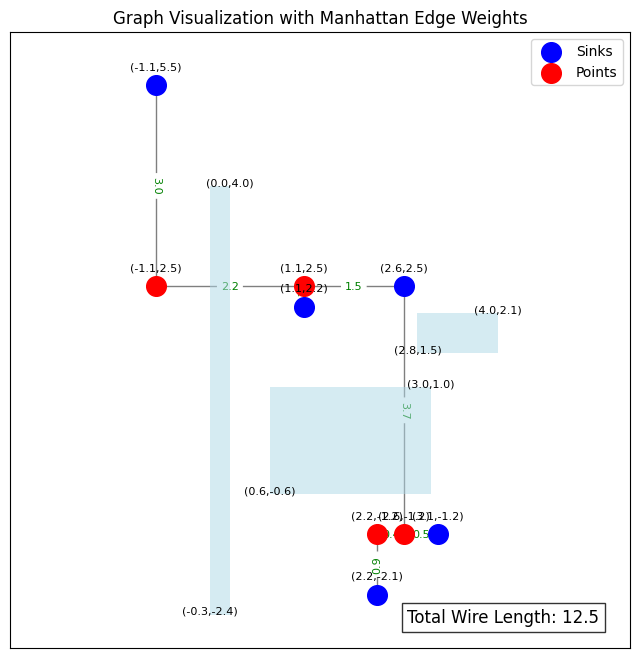

In [24]:
# File path to the .out file
file_path = "./data_b/r53b.out"

# Read the .out file
sinks, blockages, points, edges = read_out_file(file_path)


# Print the parsed data
print(f"Sinks: {sinks}")
print(f"Blockages: {blockages}")
print(f"Points: {points}")
print(f"Edges: {edges}")

# Plot the graph
plot_graph(sinks, points, edges, blockages=blockages)

Sinks: [(6, 1.8, -1.8), (26, -1.6, 2.4), (14, 1.4, -1.9), (15, -1.7, 1.9), (0, -2.5, -4.0), (27, -1.7, -3.7)]
Points: [(107, -1.7, -1.9), (1000, 1.8, -1.9), (1001, -1.6, 1.9), (1002, -2.5, -3.7)]
Edges: [(6, 1000), (15, 1001), (0, 1002), (14, 1000), (26, 1001), (27, 1002), (27, 107), (14, 107), (15, 107)]


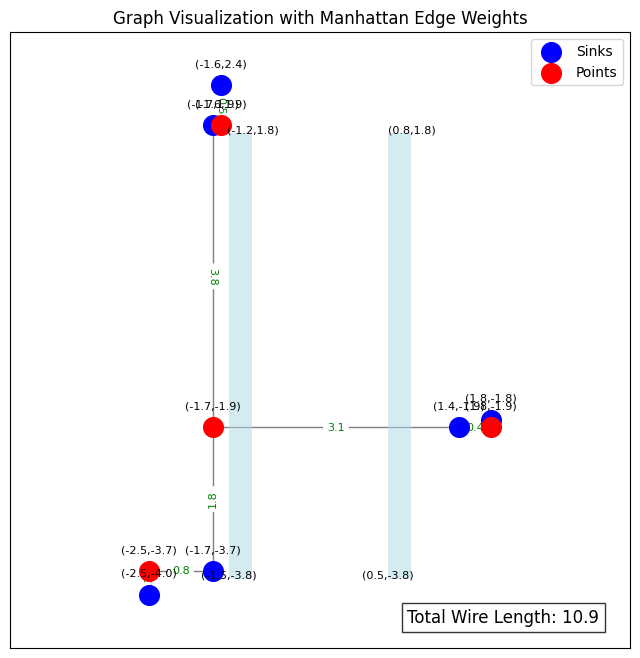

In [25]:
# File path to the .out file
file_path = "./data_b/r62b.out"

# Read the .out file
sinks, blockages, points, edges = read_out_file(file_path)

# Print the parsed data
print(f"Sinks: {sinks}")
print(f"Points: {points}")
print(f"Edges: {edges}")

# Plot the graph
plot_graph(sinks, points, edges, blockages=blockages)

Sinks: [(8, 2.7, 2.1), (14, -2.9, -1.6), (7, -1.5, -3.8)]
Blockages: [(202, -1.0, 3.0, -1.8, 0.4), (208, -2.1, -2.0, 3.0, -0.8)]
Points: [(20014, -2.9, 2.1), (20007, -1.5, -1.6)]
Edges: [(14, 20014), (20014, 8), (7, 20007), (20007, 14)]


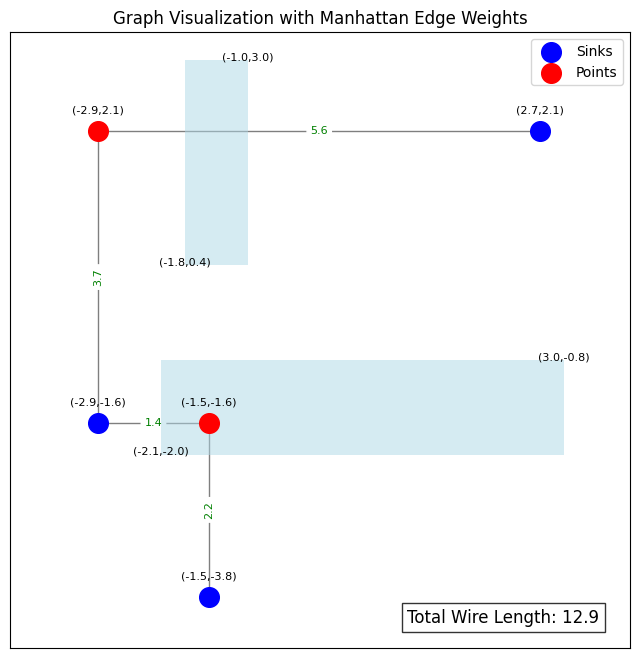

In [27]:
# File path to the .out file
file_path = "steiner_tree_output.txt"

# Read the .out file
sinks, blockages, points, edges = read_out_file(file_path)

# Print the parsed data
print(f"Sinks: {sinks}")
print(f"Blockages: {blockages}")
print(f"Points: {points}")
print(f"Edges: {edges}")

# Plot the graph
plot_graph(sinks, points, edges, blockages=blockages)

Sinks: [(8, 2.7, 2.1), (14, -2.9, -1.6), (7, -1.5, -3.8)]
Points: [(20014, -2.9, 2.1), (20007, -1.5, -1.6)]
Edges: [(14, 20014), (20014, 8), (7, 20007), (20007, 14)]


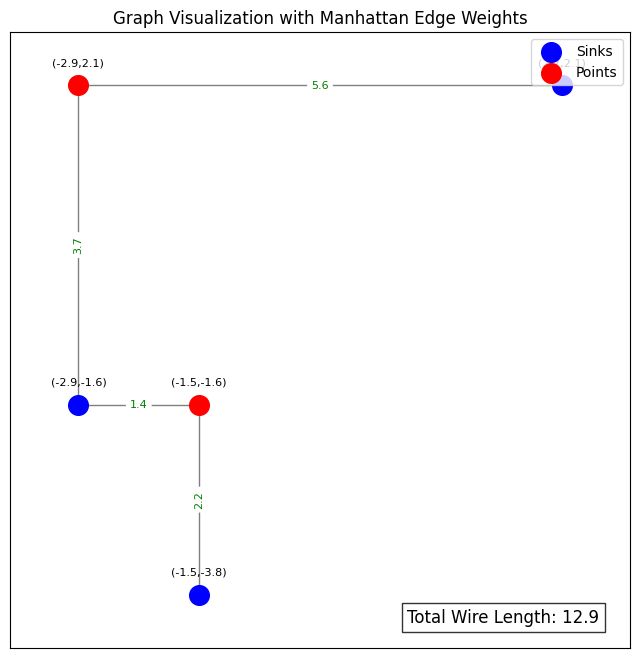

In [8]:
# File path to the .out file
file_path = 'steiner_tree_output_dp.txt'

# Read the .out file
sinks, points, edges = read_out_file(file_path)

# Print the parsed data
print(f"Sinks: {sinks}")
print(f"Points: {points}")
print(f"Edges: {edges}")

# Plot the graph
plot_graph(sinks, points, edges)

Sinks: [(8, 2.7, 2.1), (14, -2.9, -1.6), (7, -1.5, -3.8)]
Points: [(103, -1.5, -1.6), (1002, 2.7, -1.6)]
Edges: [(14, 103), (7, 103), (8, 1002), (103, 1002)]


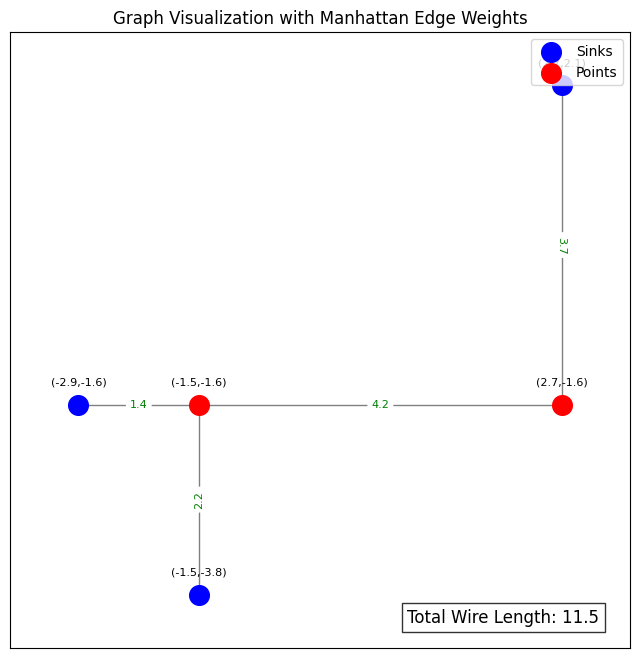

In [36]:
# Plot with NO BLOCKAGE file r31.out

# File path to the .out file
file_path = "./data/r31.out"

# Read the .out file
sinks, blockages, points, edges = read_out_file(file_path)


# Print the parsed data
print(f"Sinks: {sinks}")
print(f"Points: {points}")
print(f"Edges: {edges}")

# Plot the graph
plot_graph(sinks, points, edges)